# Projet 4 - Réalisez une étude de santé publique avec Python

# Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importation des csv

In [2]:
df_dispo_alim = pd.read_csv('dispo_alimentaire.csv')
df_sous_nutrition = pd.read_csv('sous_nutrition.csv')
df_pop = pd.read_csv('population.csv')
df_aide_alim = pd.read_csv('aide_alimentaire.csv')

In [3]:
df_pop.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


# Marc Q1 - Quel était en 2017 la proportion de personnes en état de sous-nutrition? ##

In [4]:
df_sous_nutrition["Année"].unique()

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [6]:
#changement des dates paour avoir une seule année
df_sous_nutrition["Année"].replace(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018','2017-2019'],
                                   ['2013','2014', '2015','2016','2017','2018'], inplace=True)

In [7]:
df_sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


In [8]:
df_pop

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [9]:
df_pop['Valeur'] = df_pop['Valeur']*1000
print(df_pop)

             Zone  Année      Valeur
0     Afghanistan   2013  32269589.0
1     Afghanistan   2014  33370794.0
2     Afghanistan   2015  34413603.0
3     Afghanistan   2016  35383032.0
4     Afghanistan   2017  36296113.0
...           ...    ...         ...
1411     Zimbabwe   2014  13586707.0
1412     Zimbabwe   2015  13814629.0
1413     Zimbabwe   2016  14030331.0
1414     Zimbabwe   2017  14236595.0
1415     Zimbabwe   2018  14438802.0

[1416 rows x 3 columns]


In [10]:
df_pop['Valeur'] = df_pop['Valeur']/1000000
print(df_pop)

             Zone  Année     Valeur
0     Afghanistan   2013  32.269589
1     Afghanistan   2014  33.370794
2     Afghanistan   2015  34.413603
3     Afghanistan   2016  35.383032
4     Afghanistan   2017  36.296113
...           ...    ...        ...
1411     Zimbabwe   2014  13.586707
1412     Zimbabwe   2015  13.814629
1413     Zimbabwe   2016  14.030331
1414     Zimbabwe   2017  14.236595
1415     Zimbabwe   2018  14.438802

[1416 rows x 3 columns]


In [11]:
#modifier les types de la colonne habitants (millions)
df_sous_nutrition["Année"] = df_sous_nutrition["Année"].astype('int') 

In [13]:
#Jointure entre 2 tables
df_proportion_pers = pd.merge(df_sous_nutrition, df_pop, left_on=["Zone","Année"], right_on=["Zone","Année"], how='left')
df_proportion_pers.head()


,Zone,Année,Valeur_x,Valeur_y
0,Afghanistan,2013,8.6,32.269589
1,Afghanistan,2014,8.8,33.370794
2,Afghanistan,2015,8.9,34.413603
3,Afghanistan,2016,9.7,35.383032
4,Afghanistan,2017,10.5,36.296113


In [14]:
#Renommer des colonnes
df_proportion_pers = df_proportion_pers.rename(columns = {'Zone': 'Pays', 'Valeur_x': 'Population sous-nutrition(millions)','Valeur_y':'Population pays (millions)'})

In [15]:
#Remplacer les Nan par des 0
df_proportion_pers['Population sous-nutrition(millions)'].fillna(0, inplace = True)

In [16]:
#filter par année 2017
df_proportion_pers_2017 = df_proportion_pers.loc[df_proportion_pers['Année'] == 2017]

In [17]:
#remplacer les <0.1 par 0.1
df_proportion_pers_2017.loc[df_proportion_pers_2017['Population sous-nutrition(millions)']== '<0.1', 'Population sous-nutrition(millions)'] = 0.1


In [18]:
#modifier les types de la colonne habitants (millions)
df_proportion_pers_2017 = df_proportion_pers_2017.astype({'Population sous-nutrition(millions)':'float'})
print(df_proportion_pers_2017.dtypes)

Pays                                    object
Année                                    int32
Population sous-nutrition(millions)    float64
Population pays (millions)             float64
dtype: object


In [19]:
#Somme de la pop 2017
pop_mon_2017 = df_proportion_pers_2017["Population pays (millions)"].sum()
print(pop_mon_2017)

7543.798779


In [20]:
#Somme des personnes sous-nutrition en 2017
ss_nutrition_2017 = df_proportion_pers_2017["Population sous-nutrition(millions)"].sum()
print(ss_nutrition_2017)

537.7


In [21]:
#Calcul de la proportion
prop_ssnut_2017 = (ss_nutrition_2017)/(pop_mon_2017)*100
print(prop_ssnut_2017)

7.127708675061944


In [22]:
#Arrondir le resultat a 2 decimal
prop_ssnut_2017 = round(prop_ssnut_2017, 2)
print(f'En 2017, {prop_ssnut_2017}% de la population étaient dans un état de sous-nutrition.')

En 2017, 7.13% de la population étaient dans un état de sous-nutrition.


# Marc Q2 - Quel est le nombre théorique de personnes qui pourraient être nourries en 2017? 

In [23]:
##creation d'un filtre sur l'année 2017 sur le dataframe population 
df_pop_2017 = df_pop.loc[df_pop["Année"] == 2017]
df_pop_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36.296113
10,Afrique du Sud,2017,57.009756
16,Albanie,2017,2.884169
22,Algérie,2017,41.389189
28,Allemagne,2017,82.658409


In [24]:
#La dispo alimentaire (Kcal/personne/jour) totale  par pays
grouped = df_dispo_alim.groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()
grouped.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=True)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
...,...,...
74,Israël,3610.0
171,États-Unis d'Amérique,3682.0
159,Turquie,3708.0
16,Belgique,3737.0


In [25]:
#Jointure entre 2 tables
df_dispo_alim_pop = pd.merge(grouped, df_pop_2017, left_on='Zone', right_on='Zone', how='left')
df_dispo_alim_pop.head() 

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur
0,Afghanistan,2087.0,2017.0,36.296113
1,Afrique du Sud,3020.0,2017.0,57.009756
2,Albanie,3188.0,2017.0,2.884169
3,Algérie,3293.0,2017.0,41.389189
4,Allemagne,3503.0,2017.0,82.658409


In [26]:
#Création d'une colonne pour calculer la dispo alimentaire pour la population de chaque pays
df_dispo_alim_pop["Kcal/jour"] = df_dispo_alim_pop["Valeur"]*df_dispo_alim_pop["Disponibilité alimentaire (Kcal/personne/jour)"]*1000000

In [27]:
df_dispo_alim_pop.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur,Kcal/jour
0,Afghanistan,2087.0,2017.0,36.296113,7.574999e+10
1,Afrique du Sud,3020.0,2017.0,57.009756,1.721695e+11
2,Albanie,3188.0,2017.0,2.884169,9.194731e+09
3,Algérie,3293.0,2017.0,41.389189,1.362946e+11
4,Allemagne,3503.0,2017.0,82.658409,2.895524e+11


In [28]:
resultat = round(df_dispo_alim_pop["Kcal/jour"].sum()/2500)
print(f'La disponiblité alimentaire mondiale de 2017 pouvait nourrir {resultat} de personnes')

La disponiblité alimentaire mondiale de 2017 pouvait nourrir 8367593851 de personnes


# Marc Q3 - Quel est le nombre théorique de personnes qui pourraient être nourries en 2017 avec des produits végétaux ?

In [29]:
#filtre de la dispo alimentaire sur origine vegetale
df_dispo_alim_vegetale = df_dispo_alim.loc[df_dispo_alim["Origine"] == "vegetale"]
df_dispo_alim_vegetale

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,Îles Salomon,Sésame,vegetale,NaN,NaN,0.0,0.01,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15596,Îles Salomon,Thé,vegetale,NaN,NaN,0.0,0.17,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15597,Îles Salomon,Tomates,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [30]:
#La dispo alimentaire (Kcal/personne/jour) vegetale par pays
grouped = df_dispo_alim_vegetale.groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()
grouped.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=True)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
6,Antigua-et-Barbuda,1635.0
128,République centrafricaine,1673.0
101,Mongolie,1679.0
170,Équateur,1732.0
19,Bolivie (État plurinational de),1790.0
...,...,...
3,Algérie,2915.0
157,Tunisie,2971.0
97,Maroc,3071.0
159,Turquie,3141.0


In [31]:
##creation d'un filtre sur l'année 2017 sur le dataframe population
df_pop_2017 = df_pop.loc[df_pop["Année"] == 2017]
df_pop_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36.296113
10,Afrique du Sud,2017,57.009756
16,Albanie,2017,2.884169
22,Algérie,2017,41.389189
28,Allemagne,2017,82.658409


In [32]:
#Jointure entre 2 tables
df_dispo_alim_pop_vegetale = pd.merge(grouped, df_pop_2017, left_on='Zone', right_on='Zone', how='left')
df_dispo_alim_pop_vegetale.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur
0,Afghanistan,1871.0,2017.0,36.296113
1,Afrique du Sud,2533.0,2017.0,57.009756
2,Albanie,2203.0,2017.0,2.884169
3,Algérie,2915.0,2017.0,41.389189
4,Allemagne,2461.0,2017.0,82.658409


In [33]:
#Création d'une colonne pour calculer la dispo alimentaire pour la population de chaque pays
df_dispo_alim_pop_vegetale["Kcal/jour"] = df_dispo_alim_pop_vegetale["Valeur"]*df_dispo_alim_pop_vegetale["Disponibilité alimentaire (Kcal/personne/jour)"]*1000000


In [34]:
df_dispo_alim_pop_vegetale.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur,Kcal/jour
0,Afghanistan,1871.0,2017.0,36.296113,6.791003e+10
1,Afrique du Sud,2533.0,2017.0,57.009756,1.444057e+11
2,Albanie,2203.0,2017.0,2.884169,6.353824e+09
3,Algérie,2915.0,2017.0,41.389189,1.206495e+11
4,Allemagne,2461.0,2017.0,82.658409,2.034223e+11


In [35]:
resultat = round(df_dispo_alim_pop_vegetale["Kcal/jour"].sum()/2500)
print(f'La disponiblité alimentaire mondiale de 2017 pouvait nourrir {resultat} de personnes')

La disponiblité alimentaire mondiale de 2017 pouvait nourrir 6904305685 de personnes


# Marc Q4 - Quel était l’utilisation de la disponibilité intérieure, entre la nourriture animale, la nourriture humaine et les pertes ?

In [36]:
df_dispo_alim.head(100)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Afrique du Sud,Huile d'Olive,vegetale,NaN,0.0,1.0,0.06,0.17,NaN,3.0,1.0,5.0,3.0,NaN,NaN,NaN,NaN,0.0
96,Afrique du Sud,Huile de Coco,vegetale,NaN,0.0,2.0,0.07,0.20,NaN,4.0,0.0,4.0,4.0,NaN,0.0,NaN,NaN,0.0
97,Afrique du Sud,Huile de Colza&Moutarde,vegetale,NaN,40.0,NaN,NaN,NaN,NaN,40.0,0.0,4.0,NaN,NaN,37.0,NaN,NaN,0.0
98,Afrique du Sud,Huile de Germe de Maïs,vegetale,NaN,NaN,37.0,1.52,4.16,NaN,80.0,0.0,0.0,80.0,NaN,81.0,NaN,NaN,NaN


In [37]:
#calcul de la dispo interieure
dispo_interieure = df_dispo_alim["Disponibilité intérieure"].sum()
print(dispo_interieure)

9848994.0


In [38]:
#calcul des pertes
pertes = df_dispo_alim["Pertes"].sum()
print(pertes)

453698.0


In [39]:
#proprtion de pertes
prop_perte_dispo_interieure = pertes/dispo_interieure*100 
prop_perte_dispo_interieure

4.606541541196999

In [40]:
#calcul de l'alimentation animal
alimentation_animale = df_dispo_alim["Aliments pour animaux"].sum()
print(alimentation_animale)

1304245.0


In [41]:
#proprtion de l'alimentation animal
prop_alimentation_animale_dispo_interieure = alimentation_animale/dispo_interieure*100
prop_alimentation_animale_dispo_interieure

13.242418464261426

In [42]:
#calcul de l'alimentation humaine
alimentation_humaine = df_dispo_alim["Nourriture"].sum()
print(alimentation_humaine)

4876258.0


In [43]:
#proprtion de l'alimentation humaine
prop_alimentation_humaine_dispo_interieure = alimentation_humaine/dispo_interieure*100
prop_alimentation_humaine_dispo_interieure

49.51021393657058

In [44]:
#calcul des autres utilisations de la disponibilité intérieur
autres_utilisations = df_dispo_alim["Autres Utilisations"].sum()
print(autres_utilisations)

865023.0


In [45]:
#proprtion des autres utilisations
prop_autres_utilisations_dispo_interieure = autres_utilisations/dispo_interieure*100
prop_autres_utilisations_dispo_interieure

8.782856401374598

In [46]:
#calcul de la semence pour la disponibilité intérieur
semences = df_dispo_alim["Semences"].sum()
print(semences)

154681.0


In [47]:
#proprtion de la semence 
prop_semences_dispo_interieure = semences/dispo_interieure*100
prop_semences_dispo_interieure

1.5705258831511117

In [48]:
#calcul du traitement de la disponibilité intérieur
traitement = df_dispo_alim["Traitement"].sum()
print(traitement)

2204687.0


In [49]:
#proprtion des autres utilisations
prop_traitement_dispo_interieure = traitement/dispo_interieure*100
prop_traitement_dispo_interieure

22.384895350733284

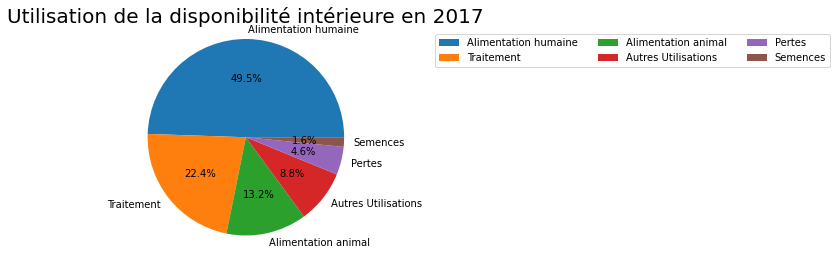

In [50]:
x=["Alimentation humaine","Traitement","Alimentation animal","Autres Utilisations","Pertes", "Semences"]
y=[alimentation_humaine,traitement,alimentation_animale,autres_utilisations,pertes,semences]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Utilisation de la disponibilité intérieure en 2017', fontsize=20)
plt.legend(bbox_to_anchor=(1.05,1),ncol=3)
plt.show()

# Mélanie Q1 - Quels étaient les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017?

In [51]:
df_sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


In [52]:
#Jointure entre 2 tables
df_ss_nutri_pop = pd.merge(df_sous_nutrition, df_pop, left_on=["Zone","Année"], right_on=["Zone","Année"])
df_ss_nutri_pop.head()

,Zone,Année,Valeur_x,Valeur_y
0,Afghanistan,2013,8.6,32.269589
1,Afghanistan,2014,8.8,33.370794
2,Afghanistan,2015,8.9,34.413603
3,Afghanistan,2016,9.7,35.383032
4,Afghanistan,2017,10.5,36.296113


In [53]:
#filter par année 2017
df_ss_nutri_pop = df_ss_nutri_pop.loc[df_ss_nutri_pop['Année'] == 2017]

In [54]:
#Renommer des colonnes
df_ss_nutri_pop = df_ss_nutri_pop.rename(columns = {'Valeur_x': 'Pop ss nutrition millions', 'Valeur_y':'Pop totale millions'})

In [55]:
df_ss_nutri_pop.head()

,Zone,Année,Pop ss nutrition millions,Pop totale millions
4,Afghanistan,2017,10.5,36.296113
10,Afrique du Sud,2017,3.1,57.009756
16,Albanie,2017,0.1,2.884169
22,Algérie,2017,1.3,41.389189
28,Allemagne,2017,NaN,82.658409


In [56]:
#Suppression des Nan
df_ss_nutri_pop = df_ss_nutri_pop.dropna()

In [57]:
df_ss_nutri_pop.head()

,Zone,Année,Pop ss nutrition millions,Pop totale millions
4,Afghanistan,2017,10.5,36.296113
10,Afrique du Sud,2017,3.1,57.009756
16,Albanie,2017,0.1,2.884169
22,Algérie,2017,1.3,41.389189
40,Angola,2017,5.8,29.816766


In [58]:
#remplacer les <0.1 par 0.01
df_ss_nutri_pop.loc[df_ss_nutri_pop['Pop ss nutrition millions']== '<0.1', 'Pop ss nutrition millions'] = 0.01

In [59]:
#modifier les types de la colonne Population sous nutrition
df_ss_nutri_pop["Pop ss nutrition millions"] = df_ss_nutri_pop["Pop ss nutrition millions"].astype('float') 

In [60]:
df_ss_nutri_pop.dtypes

Zone                          object
Année                          int32
Pop ss nutrition millions    float64
Pop totale millions          float64
dtype: object

In [61]:
#Création d'une colonne pour calculer la proportion de personne sous alimenter
df_ss_nutri_pop["Proportion en %"] = df_ss_nutri_pop["Pop ss nutrition millions"]/df_ss_nutri_pop["Pop totale millions"]*100

In [62]:
df_ss_nutri_pop.sort_values(by = 'Proportion en %', ascending = False)

,Zone,Année,Pop ss nutrition millions,Pop totale millions,Proportion en %
472,Haïti,2017,5.30,10.982366,48.259182
946,République populaire démocratique de Corée,2017,12.00,25.429825,47.188685
652,Madagascar,2017,10.50,25.570512,41.062924
622,Libéria,2017,1.80,4.702226,38.279742
604,Lesotho,2017,0.80,2.091534,38.249438
...,...,...,...,...,...
250,Chypre,2017,0.01,1.179678,0.847689
694,Maurice,2017,0.01,1.264499,0.790827
1144,Trinité-et-Tobago,2017,0.01,1.384059,0.722513
646,Macédoine du Nord,2017,0.01,2.081996,0.480308


# Mélanie Q2 - Depuis 2013, quels sont les pays qui ont bénéficié le plus de l'aide alimentaire ?

In [63]:
df_aide_alim.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [64]:
df_aide_alim2 = df_aide_alim.copy()

In [65]:
df_aide_alim2["Année"].unique()

array([2013, 2014, 2015, 2016], dtype=int64)

In [66]:
#Renommer une colonne
df_aide_alim2 = df_aide_alim2.rename(columns = {'Valeur': 'Aide alimentaire en tonnes'})

In [67]:
grouped = df_aide_alim2.groupby("Pays bénéficiaire")["Aide alimentaire en tonnes"].sum().reset_index()
grouped.sort_values("Aide alimentaire en tonnes", ascending=False)

,Pays bénéficiaire,Aide alimentaire en tonnes
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
...,...,...
73,Égypte,1122
69,Vanuatu,802
67,Timor-Leste,116
24,Géorgie,70


# Mélanie Q3 - Quels sont les pays ayant le plus/le moins de disponibilité/habitant ?

In [68]:
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [69]:
#Les pays qui ont le plus de disponibilité alimentaire par habitant
grouped = df_dispo_alim.groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()
grouped.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
...,...,...
65,Haïti,2089.0
0,Afghanistan,2087.0
91,Madagascar,2056.0
166,Zambie,1924.0


In [70]:
#Les pays qui ont le moins de disponibilité alimentaire par habitant
grouped = df_dispo_alim.groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()
grouped.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=True)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
...,...,...
74,Israël,3610.0
171,États-Unis d'Amérique,3682.0
159,Turquie,3708.0
16,Belgique,3737.0


# Julien Q1 - La répartition des céréales entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux.

In [71]:
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [72]:
df_dispo_alim["Produit"].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [73]:
#création de la liste céréale
liste_cereale = ["Avoine","Blé","Céréales, Autres","Maïs","Millet","Orge","Riz (Eq Blanchi)","Seigle","Sorgho"]

In [74]:
liste_cereale

['Avoine',
 'Blé',
 'Céréales, Autres',
 'Maïs',
 'Millet',
 'Orge',
 'Riz (Eq Blanchi)',
 'Seigle',
 'Sorgho']

In [75]:
# création de la table céréale filtrer par la liste céréale
df_cereale=df_dispo_alim[df_dispo_alim.Produit.isin(liste_cereale)]
df_cereale.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
12,Afghanistan,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,Afghanistan,Maïs,vegetale,200.0,NaN,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,NaN,NaN
34,Afghanistan,Millet,vegetale,NaN,NaN,3.0,0.40,0.02,0.08,13.0,NaN,NaN,12.0,1.0,13.0,0.0,NaN,NaN
40,Afghanistan,Orge,vegetale,360.0,NaN,26.0,2.92,0.24,0.79,524.0,NaN,10.0,89.0,52.0,514.0,22.0,NaN,0.0


In [76]:
#j'affiche les colonnes du df dont j'ai besoin
df_cereale[["Zone","Produit","Origine","Disponibilité intérieure","Aliments pour animaux","Autres Utilisations","Nourriture","Pertes","Semences","Traitement",]]


,Zone,Produit,Origine,Disponibilité intérieure,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
7,Afghanistan,Blé,vegetale,5992.0,NaN,NaN,4895.0,775.0,322.0,NaN
12,Afghanistan,"Céréales, Autres",vegetale,0.0,NaN,NaN,0.0,NaN,NaN,NaN
32,Afghanistan,Maïs,vegetale,313.0,200.0,NaN,76.0,31.0,5.0,NaN
34,Afghanistan,Millet,vegetale,13.0,NaN,NaN,12.0,1.0,0.0,NaN
40,Afghanistan,Orge,vegetale,524.0,360.0,NaN,89.0,52.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,0.0,NaN,NaN,0.0,0.0,NaN,NaN
15568,Îles Salomon,Maïs,vegetale,0.0,NaN,NaN,0.0,NaN,NaN,NaN
15575,Îles Salomon,Orge,vegetale,1.0,NaN,NaN,0.0,NaN,NaN,1.0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,49.0,0.0,12.0,36.0,1.0,0.0,NaN


In [77]:
#calcul de la disponibilité intérieure des céréales
df_dispo_int_cereale = df_cereale["Disponibilité intérieure"].sum()
print(df_dispo_int_cereale)

2406999.0


In [78]:
#calcul de l'alimentation humaine des céréales
df_nourriture_cereale = df_cereale["Nourriture"].sum()
print(df_nourriture_cereale)

1029010.0


In [79]:
#calcul de l'alimentations pour animaux des céréales
df_alim_animaux_cereale = df_cereale["Aliments pour animaux"].sum()
print(df_alim_animaux_cereale)

873535.0


In [80]:
#calcul des autres Utilisations des céréales
df_autre_utili_cereale = df_cereale["Autres Utilisations"].sum()
print(df_autre_utili_cereale)

234787.0


In [81]:
#calcul de la perte pour les céréales
df_pertes_cereale = df_cereale["Pertes"].sum()
print(df_pertes_cereale)

107120.0


In [82]:
#calcul de la perte pour les céréales
df_traitement_cereale = df_cereale["Traitement"].sum()
print(df_traitement_cereale)

94589.0


In [83]:
#calcul de la perte pour les céréales
df_semences_cereale = df_cereale["Semences"].sum()
print(df_semences_cereale)

68538.0


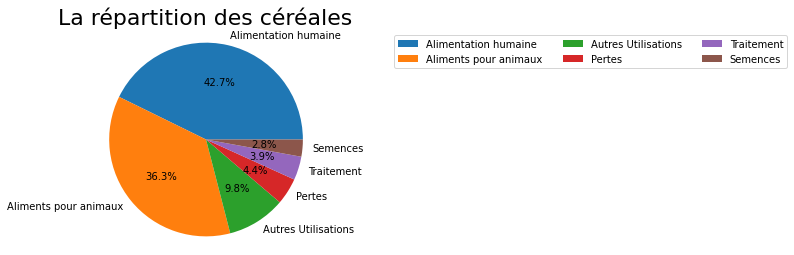

In [84]:
x=["Alimentation humaine","Aliments pour animaux","Autres Utilisations","Pertes","Traitement","Semences"]
y=[df_nourriture_cereale,df_alim_animaux_cereale,df_autre_utili_cereale,df_pertes_cereale, df_traitement_cereale,df_semences_cereale]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.axis('equal')
plt.title('La répartition des céréales', fontsize=22)
plt.legend(bbox_to_anchor=(1.05,1),ncol=3)
plt.show()

# Julien Q2 - L’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. Il serait intéressant d’aller à nouveau y jeter un coup d’œil, de mémoire ça concernait l’exportation par rapport à la production.

In [85]:
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [86]:
df_pop.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32.269589
1,Afghanistan,2014,33.370794
2,Afghanistan,2015,34.413603
3,Afghanistan,2016,35.383032
4,Afghanistan,2017,36.296113


In [87]:
df_sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


In [88]:
#Jointure entre 2 tables
df_pop_ss_nutri = pd.merge(df_sous_nutrition, df_pop, left_on=["Zone","Année"], right_on=["Zone","Année"], how='left')
df_pop_ss_nutri.head()

,Zone,Année,Valeur_x,Valeur_y
0,Afghanistan,2013,8.6,32.269589
1,Afghanistan,2014,8.8,33.370794
2,Afghanistan,2015,8.9,34.413603
3,Afghanistan,2016,9.7,35.383032
4,Afghanistan,2017,10.5,36.296113


In [89]:
#Renommer des colonnes
df_pop_ss_nutri = df_proportion_pers.rename(columns = {'Zone': 'Pays', 'Valeur_x': 'Population sous-nutrition(millions)','Valeur_y':'Pop(millions)'})

In [90]:
#filter sur le pays thailande
df_thai_pop_ss_nutri = df_pop_ss_nutri.loc[(df_pop_ss_nutri['Pays'] == 'Thaïlande')]
df_thai_pop_ss_nutri.head()

,Pays,Année,Population sous-nutrition(millions),Population pays (millions)
1110,Thaïlande,2013,6.2,68.144518
1111,Thaïlande,2014,6,68.438746
1112,Thaïlande,2015,5.9,68.714511
1113,Thaïlande,2016,6,68.971308
1114,Thaïlande,2017,6.2,69.209810


In [91]:
#modifier les types de la colonne habitants (millions)
df_thai_pop_ss_nutri = df_thai_pop_ss_nutri.astype({'Population sous-nutrition(millions)':'float'})
print(df_thai_pop_ss_nutri.dtypes)

Pays                                    object
Année                                    int32
Population sous-nutrition(millions)    float64
Population pays (millions)             float64
dtype: object


In [92]:
#Création d'une colonne pour calculer la proportion de la population en état de sous nutrition en Thailande
df_thai_pop_ss_nutri["Proportion de la population en sous nutrition"] = df_thai_pop_ss_nutri["Population sous-nutrition(millions)"]/df_thai_pop_ss_nutri["Population pays (millions)"]*100


In [93]:
df_thai_pop_ss_nutri.head()


,Pays,Année,Population sous-nutrition(millions),Population pays (millions),Proportion de la population en sous nutrition
1110,Thaïlande,2013,6.2,68.144518,9.098311
1111,Thaïlande,2014,6.0,68.438746,8.766964
1112,Thaïlande,2015,5.9,68.714511,8.586250
1113,Thaïlande,2016,6.0,68.971308,8.699270
1114,Thaïlande,2017,6.2,69.209810,8.958268


In [94]:
thailande_manioc = df_dispo_alim.loc[(df_dispo_alim['Zone'] == 'Thaïlande') & (df_dispo_alim['Produit'] == 'Manioc')]
thailande_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [95]:
#calcul de la production de manioc en thailande
thai_prod_manioc = thailande_manioc["Production"].sum()
print(thai_prod_manioc)

30228.0


In [96]:
#calcul de l'importation du manioc en thailande
thai_import_manioc = thailande_manioc["Importations - Quantité"].sum()
print(thai_import_manioc)

1250.0


In [97]:
#calcul total de la production et importation du manioc en thailande
thai_import_prod_manioc = thai_prod_manioc + thai_import_manioc
print(thai_import_prod_manioc)

31478.0


In [98]:
#calcul de l'exportation de manioc en thailande
thai_export_manioc = thailande_manioc["Exportations - Quantité"].sum()
print(thai_export_manioc)

25214.0


In [99]:
#calcul de la disponibilité intérieure du manioc en thailande
thai_dispo_int_manioc = thailande_manioc["Disponibilité intérieure"].sum()
print(thai_dispo_int_manioc)

6264.0


In [100]:
#proprtion de l'exportation de manioc par rapport a la production
prop_thai_prod_export_manioc = thai_export_manioc/thai_import_prod_manioc*100
prop_thai_prod_export_manioc

80.10038757227271

In [101]:
#proprtion de la disponibilité intérieure du manioc par rapport a la production
prop_thai_dispo_int_manioc = thai_dispo_int_manioc/thai_import_prod_manioc*100
prop_thai_dispo_int_manioc

19.899612427727302

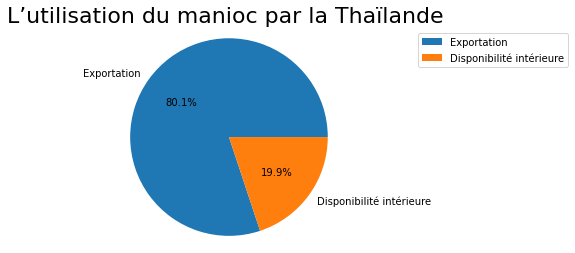

In [102]:
x=["Exportation","Disponibilité intérieure"]
y=[80.100,19.899]
plt.pie(y,labels=x,autopct='%1.1f%%')
plt.axis('equal')
plt.title('L’utilisation du manioc par la Thaïlande ', fontsize=22)
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()